In [424]:
import pandas as pd
import numpy as np
import plotly.express as px

# Data Cleaning
We will now clean the raw scraped data from Tagvenue -> we want to get it into a good state for exploration and modeling. 
## Setup

In [425]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 0

## Importing Data
Below we import the raw general venue data and the prices data as dataframes. Metadata for both tables can be found in the repo Readme. 

In [426]:
venues = pd.read_csv('../data/raw_scraped_data/tag_venue_space_data_31-Jul-22.csv')
prices = pd.read_csv('../data/raw_scraped_data/tag_venue_space_prices_31-Jul-22.csv')

## Identify Changes to Data Format
If you are re-running this code on a new set of raw scraped data, the code will not work if the data format has changed as below: 
- If column headers are missing or added in either prices or venues dataframes
- If the **price_type** column of the prices dataframe contains new combined prices types. When the code was written, **price_type** column had 2 combined prices: 'hire fee + min. spend' and 'hire fee + per person'. If more are added, or if their names have been changed, then errors will occur. 

Below we will check whether any column headers have been added or changed in the latest raw venues and prices data. Both cells below should output empty sets if nothing has changed -> this means the code should work as expected. If there have been name changes, you may be able to map the old header names used in this notebook to the new names in the latest data and thus avoid having to re-name headers in all the code. 

In [427]:
# Set of columns expected in raw prices data
expected_prices_columns = {'day_of_week', 'latitude', 'longitude', 'price',
                    'price_type', 'pricing_period', 'space_name',
                    'space_url', 'time_from', 'time_to', 'venue_name', 'venue_url'}

# Create set of columns from the latest raw prices data
latest_prices_columns = set(prices.columns.to_list())

missing_price_cols = expected_prices_columns.difference(latest_prices_columns)
new_price_cols = latest_prices_columns.difference(expected_prices_columns)

print("Columns Missing From Prices:\n", missing_price_cols)
print("New Columns in Prices:\n", new_price_cols)

Columns Missing From Prices:
 set()
New Columns in Prices:
 set()


In [428]:
# Set of columns expected in raw venues data
expected_venues_columns = {'space_url', 'venue_url', 'venue_name', 'space_name', 'latitude',
       'longitude', 'address', 'nearest_tube_station', 'max_seated',
       'max_standing', 'area_in_m2', 'catering_offered',
       'external_catering_allowed', 'supervenue', 'Standing_max', 'Dining_max',
       'Theatre_max', 'Boardroom_max', 'Classroom_max', 'Cabaret_max',
       'U-Shaped_max', 'Approved caterers only', 'BYO alcohol allowed',
       'BYO alcohol not allowed', 'External catering allowed',
       'External catering not allowed', 'In-house catering',
       'No in-house catering', 'Venue doesn’t provide alcohol',
       'Venue provides alcohol', 'Alcohol licence until 23:00',
       'Corkage fee for BYO alcohol', 'Buyout fee for external catering',
       'Kitchen facilities available for guests', 'Complimentary water',
       'Complimentary tea and coffee',
       'Alcohol licence until 23:00 (extension available)', 'Halal menu',
       'Kosher menu', 'Extensive vegan menu', 'Extensive gluten-free menu',
       'Alcohol licence until 1:30', 'Alcohol licence until 1:00',
       'Alcohol licence until 0:00',
       'Alcohol licence until 1:00 (extension available)',
       'Alcohol licence until 5:00 (extension available)',
       'Alcohol licence until 3:00 (extension available)',
       'Alcohol licence until 0:00 (extension available)',
       'Alcohol licence until 2:00 (extension available)',
       'Alcohol licence until 22:30', 'Alcohol licence until 22:00',
       'Alcohol licence until 2:00',
       'Alcohol licence until 22:30 (extension available)',
       'Alcohol licence until 3:00',
       'Alcohol licence until 0:30 (extension available)',
       'Alcohol licence until 4:00', 'Alcohol licence until 23:30',
       'Alcohol licence until 23:30 (extension available)',
       'Alcohol licence until 21:30',
       'Alcohol licence until 4:00 (extension available)',
       'Alcohol licence until 2:30', 'Alcohol licence until 0:30',
       'Alcohol licence until 22:00 (extension available)',
       'Alcohol licence until 5:00',
       'Alcohol licence until 21:00 (extension available)',
       'Alcohol licence until 2:30 (extension available)',
       'Alcohol licence until 21:00',
       'Alcohol licence until 1:30 (extension available)', 'Wi-Fi',
       'Projector', 'Flipchart', 'Natural light', 'Flatscreen TV',
       'Whiteboard', 'Conference call facilities', 'Air conditioning',
       'Storage space', 'Accommodation available', 'Parking available',
       'Own music allowed', 'Bring your own DJ',
       'PA system / music speakers available', 'Wheelchair accessible',
       'Promoted / ticketed events', 'Loud music / events', 'Wedding licence',
       'Temporary event notices (TENs) available',
       'Paid parking facilities available nearby', 'Disabled access toilets',
       'Ground level', 'Lift to all floors',
       'Free parking is available on-site'}
    
# Create set of columns from the latest raw venues data
latest_venues_columns = set(venues.columns)

missing_venue_cols = expected_venues_columns.difference(latest_venues_columns)
new_venue_cols = latest_venues_columns.difference(expected_venues_columns)

print("Columns Missing From Prices:\n", missing_venue_cols)
print("New Columns in Prices:\n", new_venue_cols)

Columns Missing From Prices:
 set()
New Columns in Prices:
 set()


As stated above, the **price_type** column of the prices dataframe contains combined prices types. When the code was written, the **price_type** column had 2 combined prices: 'hire fee + min. spend' and 'hire fee + per person'. If more are added, or if their names have been changed, then errors will occur. To Verify that there are no issues with the **price-type** data values, you can use the links below to jump to relevant parts of the code: 

Jump to [here](#pricing_strings) to see the unique values of *price_type*

Jump to [here](#pricing_clean) to see the functions that may be incompatible with changes to *price_type*

## Cleaning Prices Data
### Overview
We will start by cleaning the prices data which is previewed below: 

In [429]:
prices.head()

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,price,price_type
0,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Monday,Per hour,6:00 –,0:00,£360,hire fee per hour
1,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Tuesday,Per hour,6:00 –,0:00,£360,hire fee per hour
2,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Wednesday,Per hour,6:00 –,0:00,£360,hire fee per hour
3,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Thursday,Per hour,6:00 –,0:00,£360,hire fee per hour
4,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Friday,Per hour,6:00 –,0:00,£360,hire fee per hour


In [430]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54662 entries, 0 to 54661
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   space_url       54662 non-null  object 
 1   venue_url       54662 non-null  object 
 2   venue_name      54662 non-null  object 
 3   space_name      54662 non-null  object 
 4   latitude        54662 non-null  float64
 5   longitude       54662 non-null  float64
 6   day_of_week     54662 non-null  object 
 7   pricing_period  54662 non-null  object 
 8   time_from       51736 non-null  object 
 9   time_to         51736 non-null  object 
 10  price           51736 non-null  object 
 11  price_type      51736 non-null  object 
dtypes: float64(2), object(10)
memory usage: 5.0+ MB


In [431]:
prices.describe(include = 'all')

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,price,price_type
count,54662,54662,54662,54662,54662.000000,54662.000000,54662,54662,51736,51736,51736,51736
unique,4761,1740,1736,3216,NaN,NaN,7,7,38,46,1118,6
top,https://www.tagvenue.com/rooms/london/19621/fi...,https://www.tagvenue.com/venues/london/44/30-e...,30 euston square,whole venue,NaN,NaN,Wednesday,Per day,9:00 –,17:00,£500,hire fee
freq,56,408,408,3133,NaN,NaN,8212,15727,11574,9309,2485,17770
mean,NaN,NaN,NaN,NaN,51.511276,-0.120040,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.028975,0.063452,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,51.326833,-0.443729,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,51.503983,-0.144529,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,51.513528,-0.122588,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,51.522738,-0.084337,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning URLs
Below we check the space_url and venue_url columns contain no spaces and all start with 'https:://www.tagvenue.com'

In [432]:
# Confirm that no rows contain a ' ' character, should return no rows  
prices[prices.space_url.str.contains(" ")]

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,price,price_type


In [433]:
# Confirm that no rows contain a ' ' character, should return no rows  
prices[prices.venue_url.str.contains(" ")]

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,price,price_type


In [434]:
# Confirm all rows start with 'https://www.tagvenue.com'
assert(prices.space_url.str.contains(r'^https://www.tagvenue.com')).all()

In [435]:
# Confirm all rows start with 'https://www.tagvenue.com'
assert(prices.venue_url.str.contains(r'^https://www.tagvenue.com')).all()

### Cleaning Venue and Space Names
Below we remove leading or trailing whitspace from the venue_name and space_name columns: 

In [436]:
prices.venue_name = prices.venue_name.str.strip()
prices.space_name = prices.space_name.str.strip()

### Cleaning Longitude and Latitude
Below we check that the latitude and longitude values are all within the max and min latitude and longitude values defined in our web scrape: 

In [437]:
# Max and min latitude and longiotude values from web scrape:
latitude_min = 51.326626 
latitude_max = 51.7297765
longitude_min = -0.446500003
longitude_max = 0.2190751

assert(prices.latitude.min() > latitude_min)
assert(prices.latitude.max() < latitude_max)
assert(prices.longitude.min() > longitude_min)
assert(prices.longitude.max() < longitude_max)

<a id='pricing_strings'></a>
### Cleaning Pricing Strings
Below we review all string values taken by each of the following columns: 
- day_of_week
- pricing_period
- price_type

In [438]:
prices.day_of_week.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [439]:
prices.pricing_period.unique()

array(['Per hour', 'Per day', 'closed', 'Per evening', 'Per session',
       'Per morning', 'Per afternoon'], dtype=object)

In [440]:
prices.price_type.unique()

array(['hire fee per hour', 'hire fee', 'per person', nan, 'min. spend',
       'hire fee + min. spend', 'hire fee + per person'], dtype=object)

**Observations:** 

All columns have a small number of tidy strings that don't require cleaning. The nan values in *price_type* were to be expected, that is the value if the space is closed on a particular day (if 'pricing_period' is 'closed'). 

We need to confirm that the nan values occur across the final four columns of the prices dataframe only when the pricing_period is set to 'closed'.   

In [441]:
# filter on rows with pricing_period = 'closed'
closed_rows = prices[(prices.pricing_period == 'closed')]
# Drops 'closed' rows from dataframe
dropped_closed_rows = prices.drop(closed_rows.index)
# Display all rows in dataframe with a nan value
dropped_closed_rows[dropped_closed_rows.isna().any(axis=1)]

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,price,price_type


We have shown that after removing rows with pricing_period set to 'closed' that there are no more nan values in the dataframe. Thus all the nan values correspond with a day the space is closed and thus all the nan values were to be expected. We will remove these rows in our prices dataframe. 

In [442]:
prices = dropped_closed_rows
prices = prices.reset_index(drop = True)

### Cleaning Time Form and To
Firstly, we will clean the time_from column to remove the trailing '-' strings 

In [443]:
# Remove '-' from time_from and any remaining whitespace
prices.time_from = prices.time_from.str.replace('–','').str.strip()

Now we will convert the time data into floats e.g. '5:30' becomes '5.5'. We decided this was the easiest way to manipulate and graph the times.  

In [444]:
# Convert time to datetime object
from_time = pd.to_datetime(prices['time_from'], format='%H:%M')
# Extract and combine hours and minutes data into decimal form. 
prices.time_from = from_time.dt.hour + from_time.dt.minute / 60 

to_time = pd.to_datetime(prices['time_to'], format='%H:%M')
prices.time_to = to_time.dt.hour + to_time.dt.minute / 60 

Finally, we will calculate the time period between the time_from and time_to columns (in hours). Note that in this calculation, we calculate *time_to* - *time_from*. This sometimes gives a negative answer due to midnight going back to 0 in a 24 hour clock e.g. if time_to = 0.0 (midnight) and time_from = 6.0 (6 am) then the subtraction gives us -6. To get the correct answer we add 24 e.g. this becomes 18.  

In [445]:
# subtract time_to and time_from
prices.insert(10, 'time_period', prices.time_to - prices.time_from)
# Where the answer was negative, add 24
prices['time_period'] = np.where(prices.time_period < 0, 
                                 prices.time_period + 24, 
                                 prices.time_period)

<a id='pricing_clean'></a>
### Cleaning Price and Price Type
We will now clean the price and price type columns. There are 2 complicated cases for price and price type. When Price type is equal to 'hire fee + min. spend' or 'hire fee + per person' then the price is recorded as '£price + £price' where each price corresponds to the prices types. An example is shown below: 

**price_type** -> 'hire fee + min. spend'

**price** -> '£300 + £400' 

In this example, the hire fee is £300 and the minimum spend is £400. For all other price_types, there is only a single price provided e.g. 'per person' price_type might have a price of '£50'. 

We wish to create a new column, 'total_price' that has the total price rather than 2 prices being added together. e.g. '£300 + £400' becomes '£700'. But we also want to preserve the individual costs of hire fee and minimum spend / per person. As such, we will also create 3 new columns that contain the individual contributions to total_price of hire fee, minimum spend and per person respectively. These columns will be null for all rows except those using either 'hire fee + min. spend' or 'hire fee + per person' as the price type.

Below we build the new columns and replace the 'price' column with 'total_price'. 

In [446]:
def split_cols(price, type_):
    """Return list of cleaned price data.  
    
    If the price is a combination of prices, it will calculate the total
    price and also return the individual contributions of rent price, per 
    person and min spend."""
    # remove '£' from prices
    price = price.replace('£','')
    # checks if this price contains a '+' 
    if '+' in price:
        # splits prices between '+' into list
        price_list = price.split('+')
        # splits price type between '+' into list
        type_list = type_.split('+')
        total_price = float(price_list[0]) + float(price_list[1])
        # first price is always rent price (format is
        # '£rent price + £per person OR min. spend')
        rent_price = float(price_list[0])
        # If type includes 'min. spend' then the second price is minimum spend 
        if 'min.spend' in type_:
            min_spend = float(price_list[1])
            per_person = np.nan
        # Otherewise the second price must be per person
        else: 
            min_spend = np.nan
            per_person = float(price_list[1])
        return [total_price, type_, rent_price, min_spend, per_person]
    # returns just type and price, leaving rest of list nan if the 
    # price is not combined   
    return [float(price), type_, np.nan, np.nan, np.nan]
    
# Apply split_cols to the price and price_type columns
cleaned_price_data = [split_cols(price, type_)for price, type_ 
                      in zip(prices.price, prices.price_type)]
# Create the new columns we want
cleaned_price_df = pd.DataFrame(cleaned_price_data, 
                                columns = ['total_price', 'price_type', 
                                           'rent_price_split', 
                                           'min_spend_split', 
                                           'per_person_split'])
# drops columns we dont want anymore
prices.drop(columns = ['price', 'price_type'], inplace = True)
# Add new columns to data
prices = prices.join(cleaned_price_df)
prices.head()

,space_url,venue_url,venue_name,space_name,latitude,longitude,day_of_week,pricing_period,time_from,time_to,time_period,total_price,price_type,rent_price_split,min_spend_split,per_person_split
0,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Monday,Per hour,6.0,0.0,18.0,360.0,hire fee per hour,NaN,NaN,NaN
1,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Tuesday,Per hour,6.0,0.0,18.0,360.0,hire fee per hour,NaN,NaN,NaN
2,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Wednesday,Per hour,6.0,0.0,18.0,360.0,hire fee per hour,NaN,NaN,NaN
3,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Thursday,Per hour,6.0,0.0,18.0,360.0,hire fee per hour,NaN,NaN,NaN
4,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,Friday,Per hour,6.0,0.0,18.0,360.0,hire fee per hour,NaN,NaN,NaN


## Cleaning General Venue Data
We will now clean the general venues data previewed below: 

In [447]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   space_url                                          4761 non-null   object 
 1   venue_url                                          4761 non-null   object 
 2   venue_name                                         4761 non-null   object 
 3   space_name                                         4761 non-null   object 
 4   latitude                                           4761 non-null   float64
 5   longitude                                          4761 non-null   float64
 6   address                                            4761 non-null   object 
 7   nearest_tube_station                               4425 non-null   object 
 8   max_seated                                         4761 non-null   int64  
 9   max_stan

In [448]:
venues.describe(include = 'all')

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,max_seated,max_standing,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),Halal menu,Kosher menu,Extensive vegan menu,...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site
count,4761,4761,4761,4761,4761.000000,4761.000000,4761,4425,4761.000000,4761.000000,4761.000000,4761,4761,4761,3788.000000,3247.000000,1938.000000,2122.000000,1300.000000,1408.000000,1170.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,529,1155,1156,1156,4761.000000,4761.000000,469,3902,3902,3902,...,16,89,26,22,96,82,10,16,8,36,18,4,9,3,7,2,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,2667,4761,4761,4761,4761,4761,4761,4761,4761,1186,873,628,919,726
unique,4761,1740,1736,3216,NaN,NaN,1718,899,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,NaN,NaN,1,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,1,1
top,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/44/30-e...,30 euston square,whole venue,NaN,NaN,"30 Euston Square, Euston, London, NW1 2FB",Farringdon Station (300 yd),NaN,NaN,NaN,Venue offers catering,External catering not allowed,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,NaN,NaN,True,False,False,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,True,True,True,True,True
freq,1,24,24,329,NaN,NaN,24,42,NaN,NaN,NaN,3902,3605,4201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529,905,900,642,NaN,NaN,469,2008,2710,2077,...,16,89,26,22,96,82,10,16,8,36,18,4,9,3,7,2,4481,2706,2849,3274,2420,3574,3650,3390,3615,3881,2667,2889,3957,2889,2630,2990,3032,4063,3280,1186,873,628,919,726
mean,NaN,NaN,NaN,NaN,51.510889,-0.120217,NaN,NaN,76.337114,110.963663,203.426171,NaN,NaN,NaN,139.466209,79.027410,112.957172,24.831291,56.350769,70.993608,35.589744,0.187986,0.242596,0.757404,0.242806,0.757194,0.760134,0.239866,0.265700,0.734300,NaN,NaN,NaN,NaN,0.580130,0.190506,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [449]:
venues.head()

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,max_seated,max_standing,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),Halal menu,Kosher menu,Extensive vegan menu,...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site
0,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,"St Mary Overie Dock, Cathedral Street, London,...",London Bridge Station (350 yd),65,120,129,Venue doesn’t offer catering,External catering allowed,False,120.0,60.0,30.0,30.0,65.0,NaN,NaN,0,1,0,1,0,0,1,0,1,True,True,False,False,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN
1,https://www.tagvenue.com/rooms/london/21285/go...,https://www.tagvenue.com/venues/london/9456/go...,goodenough college events & venue hire,large common room-wgh,51.524406,-0.117326,"Mecklenburgh Square, London House, London, WC1...",Russell Square Station (600 yd),120,120,135,Venue offers catering,External catering not allowed,False,120.0,NaN,120.0,35.0,35.0,60.0,35.0,0,1,0,0,1,1,0,0,1,NaN,False,NaN,NaN,0.0,0.0,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,True,False,True,True,False,True,False,True,True,True,True,False,False,NaN,NaN,NaN,NaN,NaN
2,https://www.tagvenue.com/rooms/london/1044/gra...,https://www.tagvenue.com/venues/london/410/gra...,gracepoint,whole building,51.540573,-0.096280,"161-169 Essex Road, Islington, London, N1 2SN",Highbury & Islington Station (900 yd),1160,0,1561,Venue offers catering,External catering not allowed,False,NaN,NaN,1160.0,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN
3,https://www.tagvenue.com/rooms/london/4056/aqu...,https://www.tagvenue.com/venues/london/1635/aq...,aquilla health and fitness,studio,51.495765,-0.170124,"11 Thurloe Place, London, SW7 2RS",South Kensington Station (400 yd),0,12,35,Venue doesn’t offer catering,External catering not allowed,False,12.0,NaN,NaN,NaN,

### Cleaning Address and Nearest Tube Station
We are not going to clean the space_url, venue_url, venue_name, space_name or latitude and longitude values because we already checked these values in the prices dataframe. Ideally we should repeat those cleaning steps here just in case, but in the interests of time saving we will forgo these checks. 

We reviewed the address column and believe that the only useful information in the address would be the postcode, which could be turned into latitude and longitude values. Since we already have latitude and longitude values, we probably dont need the address information. As such, we won't clean the 'address' column, but will keep it in the data to help distinguishing different venues when we are exploring the data (e.g. if we find some strange outliers or invalid data and want to cross reference). 

The 'nearest_tube_station' column contains the name of the nearest tube station followed by the distance in yards that the venue is from that station. An example is **London Bridge Station (400 yd)**. We will split this into 2 separate columns, nearest_tube_station and tube_distance. 

Below, we split the nearest_tube_station column using the '(' as the separator. We will split the data into 3 columns, as defined below: 

|Column|Data Stored|
|---|---|
|nearest_tube_station|Name of nearest tube station to venue|
|tube_distance|Distance in yards from venue to nearest tube station| 
|overflow|In cases where the tube station name contains parenthesis e.g. **Kensignton (Olympia) (400 yd)** then it will be split into 3 columns, the first half of the name will be in nearest_tube_station, the second half of the name will be in tube_distance and the distance will be in 'overflow'. For the majority of cases, overflow will be null|

As detailed in the table, the 'overflow' column will be used to deal with special cases where tube station name contains parenthesis e.g. **Kensignton (Olympia) (400 yd)**. We will fix the data alignment in these cases later.  


In [450]:
# Insert new columns next to 'nearest_tube_station' that will store the 
# nearest_tube_station data after it is split into separate columns.
# The tube_distance column will contain the distance data. 
venues.insert(8,'tube_distance', np.nan)
# The 'overflow' column will store the distance when the tube station name
# contains extra '(' that will need to be fixed
venues.insert(9,'overflow', np.nan)
columns = ['nearest_tube_station', 'tube_distance', 'overflow']
venues[columns] = venues.nearest_tube_station.str.split('(', expand = True)

venues[columns].head()

,nearest_tube_station,tube_distance,overflow
0,London Bridge Station,350 yd),None
1,Russell Square Station,600 yd),None
2,Highbury & Islington Station,900 yd),None
3,South Kensington Station,400 yd),None
4,Poplar Station,250 yd),None


Below we filter on the rows where overflow is non-null i.e. where the tube station name contained parenthesis '(' that we will need to fix. 

In [451]:
# Filter on rows that are non-null in 'overflow' 
non_null_overflow = venues[~venues['overflow'].isnull()]
# Store the index of these rows
index = non_null_overflow.index

non_null_overflow[columns]

,nearest_tube_station,tube_distance,overflow
645,Kensington,Olympia) Station,600 yd)
765,Hammersmith,D & P) Station,200 yd)
910,Kensington,Olympia) Station,600 yd)
1336,Hammersmith,D & P) Station,200 yd)
1464,Hammersmith,D & P) Station,200 yd)
2033,Hammersmith,D & P) Station,200 yd)
2291,Hammersmith,D & P) Station,800 yd)
3147,Hammersmith,D & P) Station,200 yd)
3503,Hammersmith,D & P) Station,350 yd)
3728,Kensington,Olympia) Station,400 yd)


We will fix these rows by combining the data 'from nearest_tube_station' and 'tube_distance' into a single name and will shift the distance data from 'overflow' into 'tube_distance' 

In [452]:
# Amend 'nearest_tube_station' to be a combination of the 
# 'nearest_tube_station' and 'tube_distance' columns, with a '(' between. 
venues.loc[index, 'nearest_tube_station'] = (
    non_null_overflow['nearest_tube_station'] 
    + '(' 
    + non_null_overflow['tube_distance']
)
# Amend 'tube_distance'to have the values in 'overflow' 
venues.loc[index, 'tube_distance'] = non_null_overflow['overflow']

venues.loc[index, columns]

,nearest_tube_station,tube_distance,overflow
645,Kensington (Olympia) Station,600 yd),600 yd)
765,Hammersmith (D & P) Station,200 yd),200 yd)
910,Kensington (Olympia) Station,600 yd),600 yd)
1336,Hammersmith (D & P) Station,200 yd),200 yd)
1464,Hammersmith (D & P) Station,200 yd),200 yd)
2033,Hammersmith (D & P) Station,200 yd),200 yd)
2291,Hammersmith (D & P) Station,800 yd),800 yd)
3147,Hammersmith (D & P) Station,200 yd),200 yd)
3503,Hammersmith (D & P) Station,350 yd),350 yd)
3728,Kensington (Olympia) Station,400 yd),400 yd)


Finally, we clean the tube_distance and nearest_tube_station columns and drop the 'overflow' column. 

In [453]:
# remove the 'yd)' string from the distance
venues.tube_distance = venues.tube_distance.str.replace(' yd)', '', regex = False)
venues.tube_distance = venues.tube_distance.str.strip()
# Transform to numeric data type
venues.tube_distance = pd.to_numeric(venues.tube_distance)
# replace nearest_tube_station column data
venues['nearest_tube_station'] = venues['nearest_tube_station'].str.strip()
# Drop overflow column
venues.drop(axis = 1, columns = 'overflow', inplace = True)

### Cleaning Max Seated / Standing and Area
We can check the venues.info() cell above and see that the columns max_seated, max_standing and area_in_m2 are all of type int64 and have no null values, meaning they all contain integer values as expected. 

We will quickly review their max and min values to check that the numbers look reasonable. 

In [454]:
venues[['max_seated', 'max_standing', 'area_in_m2']].max()

max_seated       4000
max_standing     4000
area_in_m2      34100
dtype: int64

In [455]:
venues[['max_seated', 'max_standing', 'area_in_m2']].min()

max_seated      0
max_standing    0
area_in_m2      0
dtype: int64

**Observations:**
- The maximum values all look reasonable, they are positive and realistic. They may be much larger than typical venue sizes and thus could be treated as outliers later on, but we can see no obvious reason to doubt their validity.   
- The minimum seated and standing are reasonable i.e. 0 but not negative, but the minimum area of 0 is impossible, obviously a venue should have a non-zero area. 
- It is worth checking that the max_seated and max_standing columns are never both zero at the same time. 

We will first investigate the zero area rows. They are shown below. 

In [456]:
venues[venues.area_in_m2 == 0]

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,tube_distance,max_seated,max_standing,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),Halal menu,Kosher menu,...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site
976,https://www.tagvenue.com/rooms/london/22296/pl...,https://www.tagvenue.com/venues/london/9920/pl...,platform,multiplayer booth,51.522018,-0.086008,"2b Worship St, Finsbury, London, EC2A 2AH",Old Street Station,500.0,6,0,0,Venue offers catering,External catering not allowed,False,NaN,6.0,NaN,NaN,NaN,6.0,NaN,0,0,1,0,1,1,0,0,1,True,NaN,NaN,NaN,0.0,0.0,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True,True,False,False,True,False,False,NaN,True,True,True,True,False,False,False,True,True,True,True,NaN,NaN
3267,https://www.tagvenue.com/rooms/london/4578/lon...,https://www.tagvenue.com/venues/london/1822/lo...,london party pub crawl,hen party pink package,51.509697,-0.132545,"Haymarket, 29, London, SW1Y 4SP",Piccadilly Circus Station,150.0,0,60,0,Venue doesn’t offer catering,External catering not allowed,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,1,0,1,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN
4637,https://www.tagvenue.com/rooms/london/417/conw...,https://www.tagvenue.com/venues/london/186/con...,conway hall,the library,51.519792,-0.118337,"25 Red Lion Square, London, WC1R 4RL",Holborn Station,350.0,60,40,0,Venue offers catering,External catering not allowed,False,40.0,NaN,60.0,16.0,60.0,NaN,16.0,0,0,1,0,1,1,0,1,0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN


Upon investigating, it turns out one of the venues was actually a party package going to various venues, and thus is not actually a venue at all. The other 2 spaces had errors in the area provided i.e. were incorrectly set to 0. We will drop the non-venue row (3267).

In [457]:
venues.drop(3267, inplace = True)
venues.reset_index(drop = True)

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,tube_distance,max_seated,max_standing,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),Halal menu,Kosher menu,...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site
0,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,"St Mary Overie Dock, Cathedral Street, London,...",London Bridge Station,350.0,65,120,129,Venue doesn’t offer catering,External catering allowed,False,120.0,60.0,30.0,30.0,65.0,NaN,NaN,0,1,0,1,0,0,1,0,1,True,True,False,False,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN
1,https://www.tagvenue.com/rooms/london/21285/go...,https://www.tagvenue.com/venues/london/9456/go...,goodenough college events & venue hire,large common room-wgh,51.524406,-0.117326,"Mecklenburgh Square, London House, London, WC1...",Russell Square Station,600.0,120,120,135,Venue offers catering,External catering not allowed,False,120.0,NaN,120.0,35.0,35.0,60.0,35.0,0,1,0,0,1,1,0,0,1,NaN,False,NaN,NaN,0.0,0.0,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,True,False,True,True,False,True,False,True,True,True,True,False,False,NaN,NaN,NaN,NaN,NaN
2,https://www.tagvenue.com/rooms/london/1044/gra...,https://www.tagvenue.com/venues/london/410/gra...,gracepoint,whole building,51.540573,-0.096280,"161-169 Essex Road, Islington, London, N1 2SN",Highbury & Islington Station,900.0,1160,0,1561,Venue offers catering,External catering not allowed,False,NaN,NaN,1160.0,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN
3,https://www.tagvenue.com/rooms/london/4056/aqu...,https://www.tagvenue.com/venues/london/1635/aq...,aquilla health and fitness,studio,51.495765,-0.170124,"11 Thurloe Place, London, SW7 2RS",South Kensington Station,400.0,0,12,35,Venue doesn’t offer catering,External catering not allowed,False,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,1,1,0,NaN,

The above investigation identified a general issue with the areas reported by some venues. For example, a venue might have a maximum standing space for 250 and a reported area of 2 m2, which is obviously wrong. We wanted a way to identify these incorrectly reported areas. 

Firstly, we created a new column called 'max_seated_or_standing' which contained the maximum of either max_standing or max_seated. We would use this as a rough proxy for the expected size of the venue. 

In [458]:
max_seated_or_standing = np.where(venues.max_seated > venues.max_standing, 
                                  venues.max_seated, venues.max_standing)
venues.insert(11, 'max_seated_or_standing', max_seated_or_standing)

Initially, we tried to build a simple OLS regression model between 'max_seated_or_standing' and 'area_in_m2'. We hoped we could identify outliers from this model. The model is visualised below, it has a very low R2 value and is clearly a bad fit. 

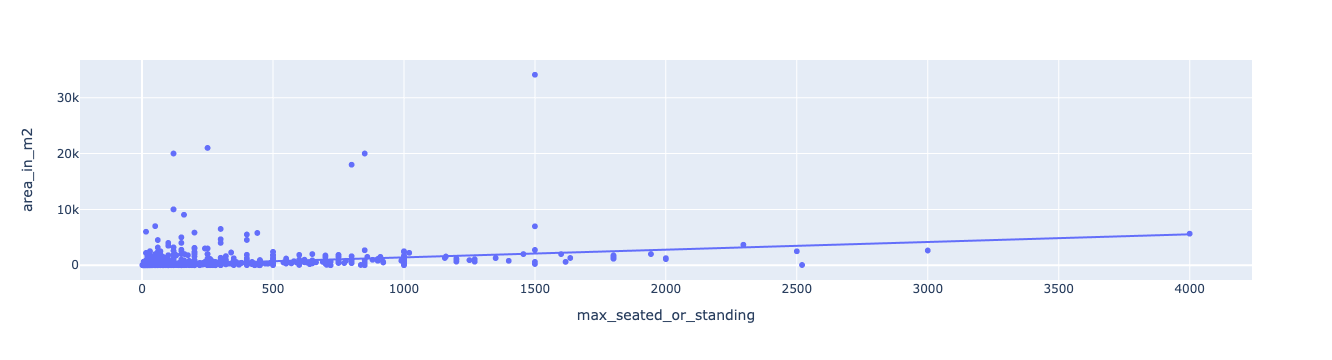

In [459]:
fig = px.scatter(venues, x="max_seated_or_standing", y="area_in_m2", trendline="ols")
fig.show()

As such, we changed strategies and instead created a new variable, min_area_per_person, which was the 'area_in_m2' divided by 'max_seated_or_standing', giving us the minimum area per person. 

We estimated that a reasonable minimum area per person was probably 0.5 -> that is 0.5 m2 per person. To test the validity of our estimate, we plotted a histogram and strip plot of min_area_per_person. We also calculated the mean, median and 8th quantile. 

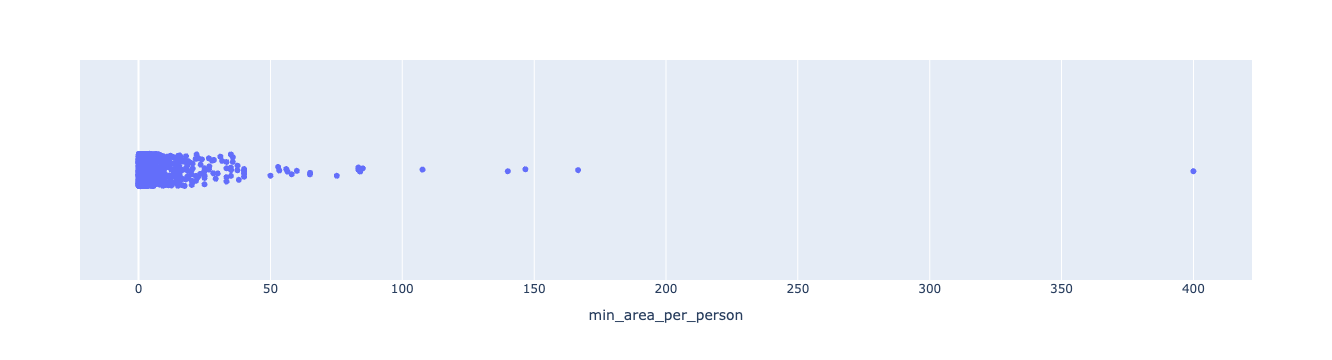

In [460]:
min_area_per_person = venues.area_in_m2 / venues.max_seated_or_standing
venues.insert(12, 'min_area_per_person', min_area_per_person)

fig = px.strip(venues, x = 'min_area_per_person')
fig.show()

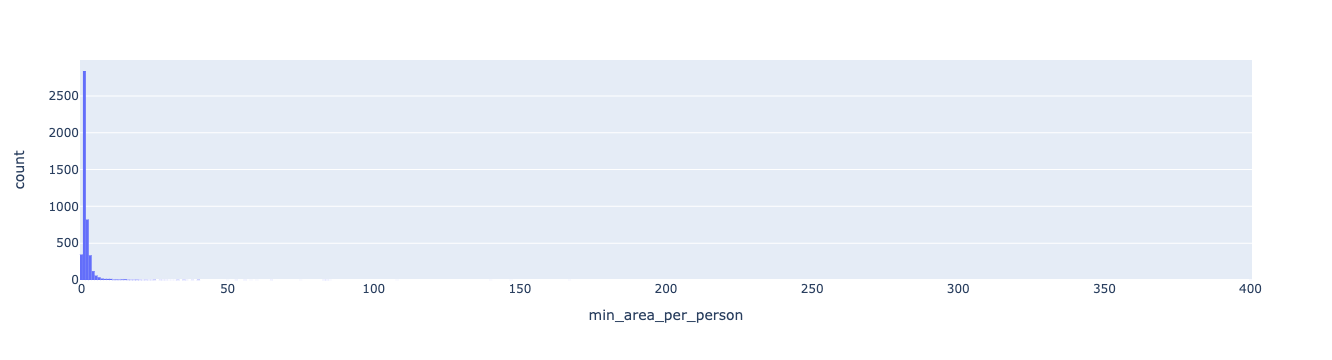

In [461]:
fig = px.histogram(venues, x = 'min_area_per_person')
fig.show()

In [462]:
venues.min_area_per_person.mean()

2.35211553205619

In [463]:
venues.min_area_per_person.median()

1.1

In [464]:
venues.min_area_per_person.quantile(0.08)

0.5

The distribution is approximately normal in shape (with very long tails, the plots above have been zoomed in). The median suggests a typical area per person of 1.1 and this is reflected in both the above plots. We can see that the histograms lowest bin goes between 0 and 0.5 and suggests that 0.5 or lower could be a reasonable cut off for abnormally low values, less than half the typical value and accounting for the lowest 8% of spaces.

We are going to assume that any min_area_per_person that is less than 0.5 is due to an incorrect area and we will define the area as null. 

In [465]:
# get index of rows with min_area_per person < 0.5
incorrect_area = venues[venues.min_area_per_person < 0.5].index
venues.loc[incorrect_area, ['area_in_m2', 'min_area_per_person']] = np.nan

Finally, we will check whether the max and min standing / seated are ever zero simultaneously. 

In [466]:
venues[venues.max_seated_or_standing == 0] 

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,tube_distance,max_seated,max_standing,max_seated_or_standing,min_area_per_person,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site


In [467]:
venues.head()

,space_url,venue_url,venue_name,space_name,latitude,longitude,address,nearest_tube_station,tube_distance,max_seated,max_standing,max_seated_or_standing,min_area_per_person,area_in_m2,catering_offered,external_catering_allowed,supervenue,Standing_max,Dining_max,Theatre_max,Boardroom_max,Classroom_max,Cabaret_max,U-Shaped_max,Approved caterers only,BYO alcohol allowed,BYO alcohol not allowed,External catering allowed,External catering not allowed,In-house catering,No in-house catering,Venue doesn’t provide alcohol,Venue provides alcohol,Alcohol licence until 23:00,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Alcohol licence until 23:00 (extension available),...,Alcohol licence until 22:30 (extension available),Alcohol licence until 3:00,Alcohol licence until 0:30 (extension available),Alcohol licence until 4:00,Alcohol licence until 23:30,Alcohol licence until 23:30 (extension available),Alcohol licence until 21:30,Alcohol licence until 4:00 (extension available),Alcohol licence until 2:30,Alcohol licence until 0:30,Alcohol licence until 22:00 (extension available),Alcohol licence until 5:00,Alcohol licence until 21:00 (extension available),Alcohol licence until 2:30 (extension available),Alcohol licence until 21:00,Alcohol licence until 1:30 (extension available),Wi-Fi,Projector,Flipchart,Natural light,Flatscreen TV,Whiteboard,Conference call facilities,Air conditioning,Storage space,Accommodation available,Parking available,Own music allowed,Bring your own DJ,PA system / music speakers available,Wheelchair accessible,Promoted / ticketed events,Loud music / events,Wedding licence,Temporary event notices (TENs) available,Paid parking facilities available nearby,Disabled access toilets,Ground level,Lift to all floors,Free parking is available on-site
0,https://www.tagvenue.com/rooms/london/19171/th...,https://www.tagvenue.com/venues/london/2034/th...,the golden hinde,entire ship,51.507014,-0.090456,"St Mary Overie Dock, Cathedral Street, London,...",London Bridge Station,350.0,65,120,120,1.075000,129.0,Venue doesn’t offer catering,External catering allowed,False,120.0,60.0,30.0,30.0,65.0,NaN,NaN,0,1,0,1,0,0,1,0,1,True,True,False,False,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN
1,https://www.tagvenue.com/rooms/london/21285/go...,https://www.tagvenue.com/venues/london/9456/go...,goodenough college events & venue hire,large common room-wgh,51.524406,-0.117326,"Mecklenburgh Square, London House, London, WC1...",Russell Square Station,600.0,120,120,120,1.125000,135.0,Venue offers catering,External catering not allowed,False,120.0,NaN,120.0,35.0,35.0,60.0,35.0,0,1,0,0,1,1,0,0,1,NaN,False,NaN,NaN,0.0,0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,False,False,True,False,True,True,False,True,False,True,True,True,True,False,False,NaN,NaN,NaN,NaN,NaN
2,https://www.tagvenue.com/rooms/london/1044/gra...,https://www.tagvenue.com/venues/london/410/gra...,gracepoint,whole building,51.540573,-0.096280,"161-169 Essex Road, Islington, London, N1 2SN",Highbury & Islington Station,900.0,1160,0,1160,1.345690,1561.0,Venue offers catering,External catering not allowed,False,NaN,NaN,1160.0,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN
3,https://www.tagvenue.com/rooms/london/4056/aqu...,https://www.tagvenue.com/venues/london/1635/aq...,aquilla health and fitness,studio,51.495765,-0.170124,"11 Thurloe Place, London, SW7 2RS",South Kensington Station,400.0,0,12,12,2.916667,35.0,Venue doesn’t offer catering,External catering not allowed,False,1

### Cleaning Layout Section
Next we will clean the layout section - these are the columns like Theatre_max, Boardroom_max etc. which describe a room layout in the column name and have a value corresponding to the maximum number of people who can be accommodated with that layout. E.g. Boardroom_max might have a value of 40 meaning that if you set up the space as a boardroom, it can accommodate 40 people. 

Firstly, we will move the 'external_catering_allowed', 'catering_offered' and 'supervenue' columns to the right of the layout columns, because we think it makes more sense. 

In [468]:
external_catering_allowed = venues.pop('external_catering_allowed')
catering_offered = venues.pop('catering_offered')
supervenue = venues.pop('supervenue')

venues.insert(21, 'supervenue', supervenue)
venues.insert(22, 'external_catering_allowed', external_catering_allowed)
venues.insert(23, 'catering_offered', catering_offered)

Each layout column contains 2 bits of information: 
1. Is this layout available
2. If so, what is the max number of people

We want to split this info out into 2 separate columns, to make the data exploration a bit easier. To do this we will split each layout into 2 columns, a Bool column that defines whether the layout is available and a max capacity column that defines the maximum capacity. At present, if the layout is unavailable, its max capacity will be set to null. We will change this so that it is set to zero. Also note, the Standing_max column contains redundant data, all its info is already contained in the max_standing column, so we will drop this column and add a bool column for max_standing.  

In [469]:
# Drop redundant Standing_max column
venues.drop(axis = 1, columns = 'Standing_max', inplace = True)

# Create Bool columns for each layout, with True if non-null 
# or > 0 and False if 0 or null.  
standing = np.where(venues.max_standing > 0, True, False)
dining =  np.where(venues.Dining_max > 0, True, False)
theatre =  np.where(venues.Theatre_max > 0, True, False)
boardroom =  np.where(venues.Boardroom_max > 0, True, False)
classroom =  np.where(venues.Classroom_max > 0, True, False)
cabaret =  np.where(venues.Cabaret_max > 0, True, False)
u_shaped =  np.where(venues['U-Shaped_max'] > 0, True, False)

# Insert bool columns into venues
venues.insert(14, 'standing', standing)
venues.insert(15, 'dining', dining)
venues.insert(16, 'theatre', theatre)
venues.insert(17, 'boardroom', boardroom)
venues.insert(18, 'classroom', classroom)
venues.insert(19, 'cabaret', cabaret)
venues.insert(20, 'u_shaped', u_shaped)

# Fill nan values with 0 
venues.loc[:, 'Dining_max':'U-Shaped_max'] = (
    venues.loc[:, 'Dining_max':'U-Shaped_max'].fillna(0)
)

Finally, we will perform a quick check that the max_seated value is correct by calculating this value explicitly and comparing it with max_seated.  

In [470]:
max_seated_per_row = venues.loc[:, 'Dining_max':'U-Shaped_max'].max(axis=1)
assert(max_seated_per_row == venues.max_seated).all()

### Cleaning Remaining categorical and Bool Columns
The remaining columns are of the following forms:
- True / False Bool columns e.g. the 'supervenue' column is either True or False to indicate if this venue is a supervenue. 
- Binary 1 or 0 columns to indicate if something is available e.g. the column 'Wifi' has a 1 if wifi is available and a 0 if it is not. 
- Simple categorical columns (e.g. for external_catering_allowed there are 2 categories: 'external catering allowed' and 'external catering not allowed') 

As we will see, some of the Binary columns are mutually exclusive e.g. 'BYO alcohol not allowed' and 'BYO alcohol allowed' are effectively One Hot Encoded i.e. when one is 1, the other will be 0. Thus, we will combine these columns into a single categorical column (this will be easier to use in plotting during data exploration).  

In general, we will aim to make all these columns either categorical or Bool, i.e. we dont want any binary columns (1 or 0). Some of them will contain null values. We will try and remove these as well, as long as it makes sense to do so.  

#### Supervenue
We will start off by reviewing the  'supervenue' column. This is a simple True / False bool column and by looking at the venues.info() output (at top) you can easily see it contains no nan values and is of type bool meaning all the entries must be True or False. We will perform a quick second check, a value_count on the column: 

In [471]:
venues['supervenue'].value_counts()

False    4200
True      560
Name: supervenue, dtype: int64

The 'supervenue' column looks good. 

#### Catering
We will now review the various catering related columns. We have many different catering columns listed below: 

|column name|Description|Possible Values|
|:---|:---|:---|
|external_catering_allowed|Indicates if any external caterer is allowed|<ul><li>External catering allowed</li><li>External catering not allowed</li></ul>|
|catering_offered|Indicates if the venue either has in-house catering or allows external catering from an approved list (cannot use any External caterer)|<ul><li>Venue offers catering</li><li>Venue doesn’t offer catering</li></ul>|
|Approved caterers only|Indicates if the venue allows external caterers from an approved list (cannot use any External caterer)|<ul><li>1</li><li>0</li></ul>|
|External catering not allowed|Indicates if any external caterer is **not** allowed (cannot use any External caterer)|<ul><li>1</li><li>0</li></ul>|
|External catering allowed|Indicates if any external caterer is allowed|<ul><li>1</li><li>0</li></ul>|
|In-house catering|Indicates if the venue has in-house catering available|<ul><li>1</li><li>0</li></ul>|
|No in-house catering|Indicates if the venue does **not** have in-house catering available|<ul><li>1</li><li>0</li></ul>|

It should be noted that the following pairs of columns are mutually exclusive i.e. if one is 1 then the other is 0: 
- **External catering not allowed** and **External catering allowed**
- **In-house catering** and **No in-house catering**

The easiest way to understand these columns is to perform value counts across similar columns to see all the unique permutations. We will start with the columns that relate to external catering:

In [472]:
venues[['external_catering_allowed', 'External catering not allowed', 
        'External catering allowed', 'Approved caterers only']].value_counts()

external_catering_allowed      External catering not allowed  External catering allowed  Approved caterers only
External catering not allowed  1                              0                          0                         2709
External catering allowed      0                              1                          0                         1156
External catering not allowed  1                              0                          1                          895
dtype: int64

We can see that 'External catering not allowed'  and 'External catering allowed' are mutually exclusive (if one is 1, the other is 0) and that the data from these columns is already contained in the 'external_catering_allowed' column. That means we can drop 'External catering not allowed'  and 'External catering allowed' without losing any information. We can also see that when 'external_catering_allowed' has the value 'External catering not allowed' then either this is because the venue uses an Approved vendor list ('Approved caterers only' is 1) or because there is neither an approved vendor list nor any External vendor i.e. the venue does not allow External catering of any kind. 

This can be a bit confusing, so to be clear, a venue has 3 possible mutually exclusive External Catering options: 
- External Caterer from Approved List
- Any External Caterer
- No External Catering

We will combine the 'external_catering_allowed' and 'Approved caterers only' columns to create a single column with all external catering options and will drop the remaining external catering columns (Approved caterers only column will be kept briefly for following analysis): 

In [473]:
# Create new 'external_catering' column in desired location 
venues.insert(28,'external_catering', '')

# Concatenate 'external_catering_allowed' and 'Approved caterers only'
# columns together
venues['external_catering'] = (venues.external_catering_allowed 
                               + venues['Approved caterers only'].astype(str)
                        )
venues['external_catering'].value_counts()

External catering not allowed0    2709
External catering allowed0        1156
External catering not allowed1     895
Name: external_catering, dtype: int64

In [474]:
# dictionary mapping old values to more understandable values
values = {'External catering not allowed0': 'No External Catering',
          'External catering allowed0': 'Any External Caterer',
          'External catering not allowed1': 'External Caterer from Approved List'}
# Map new value names
venues.external_catering = venues.external_catering.map(values)
venues['external_catering'].value_counts()

No External Catering                   2709
Any External Caterer                   1156
External Caterer from Approved List     895
Name: external_catering, dtype: int64

In [475]:
# Drop old columns
venues.drop(axis = 1, columns = ['external_catering_allowed', 
                                 'External catering not allowed', 
                                 'External catering allowed'], inplace = True)

Below, we will perform a value count across the remaining catering columns (the ones not related to external catering) and will include 'Approved caterers only' because it relates to the 'catering_offered' column: 

In [476]:
venues[['catering_offered', 
        'Approved caterers only', 'In-house catering', 
        'No in-house catering']].value_counts()

catering_offered              Approved caterers only  In-house catering  No in-house catering
Venue offers catering         0                       1                  0                       3007
Venue doesn’t offer catering  0                       0                  1                        858
Venue offers catering         1                       1                  0                        612
                                                      0                  1                        283
dtype: int64

From the above, we can interpret the 'catering_offered' column as follows: 
- It will have the value **'venue offers catering'** if either: 
  1. The venue has in-house catering **but doesn't** allow external vendors from an approved list
  2. The venue has in-house catering **and allows** external vendors from an approved list
  3. The venues does not have in-house catering **But does** allow external vendors from an approved list
- It will have the value **'Venue doesn’t offer catering'** if the venue does not have in-house cater **and doesn't** allow external vendors from an approved list

Basically, if food is available at the venue either through an approved external vendor list or through an in-house kitchen, 'catering_offered' will have the value 'venue offers catering'.

We can also see that 'In-house catering' and  'No in-house catering' are mutually exclusive. The 'catering_offered' column is formed from the 3 columns 'Approved caterers only', 'In-house catering' and 'No in-house catering'. It has effectively lost some information because you can't tell if it means the venue has in-house catering or an approved external list or both. As such, we can drop it - the remaining 3 columns contain its information already. The 2 in-house catering columns are totally independent of the 'Approved caters only column' and so we can consider them a separate variable. Because the 2 in-house catering columns are mutually exclusive we will drop one.

Below we tidy up the 'In-house catering' column and drop the remaining columns. 

In [477]:
# Drop unwanted columns
venues.drop(axis = 1, columns = ['catering_offered', 
                                 'Approved caterers only', 
                                 'No in-house catering'], 
            inplace = True)
# Shift and rename 'In-house catering' column 
in_house_kitchen = venues.pop('In-house catering')
venues.insert(29, 'in_house_kitchen', in_house_kitchen)

# Map 1 and 0 to True and False 
values = {1: True, 0: False}
venues.in_house_kitchen = venues.in_house_kitchen.map(values)

Finally, below we show the permutations between our new columns 'in_house_kitchen' and 'external_catering' to show that they are indeed independent of one another: 

In [478]:
venues[['in_house_kitchen', 'external_catering']].value_counts()

in_house_kitchen  external_catering                  
True              No External Catering                   2536
False             Any External Caterer                    685
True              External Caterer from Approved List     612
                  Any External Caterer                    471
False             External Caterer from Approved List     283
                  No External Catering                    173
dtype: int64

It may be useful to combine these columns together when we perform a regression, we may test that. 

#### BYO or Venue Provided Alcohol
We will now analyse the following pairs of mutually exclusive columns: 
- **BYO alcohol allowed** and **BYO alcohol not allowed**
- **Venue doesn’t provide alcohol** and **Venue provides alcohol**

We will first perform value counts on each pair to confirm they are mutually exclusive: 

In [479]:
venues[['BYO alcohol allowed', 'BYO alcohol not allowed']].value_counts()

BYO alcohol allowed  BYO alcohol not allowed
0                    1                          3605
1                    0                          1155
dtype: int64

In [480]:
venues[['Venue doesn’t provide alcohol', 'Venue provides alcohol']].value_counts()

Venue doesn’t provide alcohol  Venue provides alcohol
0                              1                         3495
1                              0                         1265
dtype: int64

We have confirmed they are mutually exclusive. We will now combine each pair into a single bool column, which will be a better format for plotting when exploring the data: 

In [481]:
byo_alcohol_allowed = np.where(venues['BYO alcohol allowed'] == 1, 
                               True, False)
venue_provides_alcohol = np.where(venues['Venue provides alcohol'] == 1, 
                                  True, False)

venues.insert(30, 'byo_alcohol_allowed', byo_alcohol_allowed)
venues.insert(31, 'venue_provides_alcohol', venue_provides_alcohol)

venues.drop(axis = 1, columns =['BYO alcohol allowed', 
                                'BYO alcohol not allowed', 
                                'Venue doesn’t provide alcohol', 
                                'Venue provides alcohol'], 
            inplace = True)

Below we preview the new columns: 

In [482]:
venues[['byo_alcohol_allowed', 'venue_provides_alcohol']].sample(10)

,byo_alcohol_allowed,venue_provides_alcohol
3742,False,True
593,True,False
1279,False,True
3738,False,True
2832,False,False
2571,False,True
521,True,True
2874,False,True
570,False,True
561,False,True


#### Alcohol Licence
We have a number of columns with a name of the form **Alcohol licence until \<time>** e.g. 'Alcohol licence until 23:00' and sometimes they are appended with '(extension available)' e.g. 'Alcohol licence until 23:00 (extension available)'. 

These columns have one of 2 values, either 'True' to indicate that the columns named alcohol license is available or nan to indicate this is not the licence used by the venue. E.g. if the column 'Alcohol licence until 23:00' is True then the venue has an 23:00 alcohol licence. 

We expect these columns to be mutually exclusive (i.e. for each row, only a single alcohoil licence column will be True, the rest will be nan). We also want to know what it means if a venue has no alcohol licence i.e. if all entries are nan.

Below, we store and show the alcohol licence columns. 

In [483]:
alcohol_licences = [column for column in venues.columns 
                    if 'Alcohol licence' in column]
alcohol_licences

['Alcohol licence until 23:00',
 'Alcohol licence until 23:00 (extension available)',
 'Alcohol licence until 1:30',
 'Alcohol licence until 1:00',
 'Alcohol licence until 0:00',
 'Alcohol licence until 1:00 (extension available)',
 'Alcohol licence until 5:00 (extension available)',
 'Alcohol licence until 3:00 (extension available)',
 'Alcohol licence until 0:00 (extension available)',
 'Alcohol licence until 2:00 (extension available)',
 'Alcohol licence until 22:30',
 'Alcohol licence until 22:00',
 'Alcohol licence until 2:00',
 'Alcohol licence until 22:30 (extension available)',
 'Alcohol licence until 3:00',
 'Alcohol licence until 0:30 (extension available)',
 'Alcohol licence until 4:00',
 'Alcohol licence until 23:30',
 'Alcohol licence until 23:30 (extension available)',
 'Alcohol licence until 21:30',
 'Alcohol licence until 4:00 (extension available)',
 'Alcohol licence until 2:30',
 'Alcohol licence until 0:30',
 'Alcohol licence until 22:00 (extension available)',
 'Alc

Firstly, we will confirm whether the alcohol licences are mutually exclusive as expected: 

In [484]:
# For each row, sum the values in each alcohol licence column
sum_accross_licence_columns = venues[alcohol_licences].sum(axis = 1)
# Find maximum sum value across all rows
sum_accross_licence_columns.max()

1.0

We have shown the rows never sum to more than 1 i.e. there is always only one Alcohol column which is True and the rest are nan. This confirms they are mutually exclusive. 

We now want to figure out what it means if all the alcohol columns are nan. To do this, we will make a new column called **alcohol_licence_available** which indicates whether all alcohol licence columns are nan for each row. We then perform a value count with this and the 'venue_provides_alcohol' and 'byo_alcohol_allowed' columns to see how they relate. 

In [485]:
# creates column that is 1 if ANY of alcohol licence columns is True, otherwise 
# it will be nan
venues['alcohol_licence_available'] = venues[alcohol_licences].max(axis = 1)
# Perform value counts to get unique permutations between selected columns
venues[['alcohol_licence_available', 'venue_provides_alcohol', 
        'byo_alcohol_allowed']].value_counts(dropna = False)

alcohol_licence_available  venue_provides_alcohol  byo_alcohol_allowed
1.0                        True                    False                  2737
NaN                        False                   False                   868
1.0                        True                    True                    758
NaN                        False                   True                    397
dtype: int64

From this, we can see that whenever 'alcohol_licence_available' is 1, 'venue_provides_alcohol' is True. And when 'alcohol_licence_available' is nan, 'venue_provides_alcohol' is False. This means 'venue_provides_alcohol' is telling us whether the venue has an alcohol licence but doesn't tell us if you can bring your own alcohol. This means we can drop the 'alcohol_licence_available' column because its information is redundant. 

We now have a better understanding of the alcohol licence columns and have confirmed they make sense. We will create 2 new categorical columns from them. One will have the time of the alcohol licence (or will state 'no alcohol available') and the other will state whether an extension is available (or whether no alcohol is available). The reason we will split the time and extension data is because we have too many categories when you split by extension and time simultaneously, and some categories have very few observations, hence will be subject to over-fitting. 

In [486]:
# filter on the columns with 'Alcohol licence' in the name
alcohol_licence = venues[alcohol_licences]
# Add a new first column called 'alcohol not available'. If all the
# alcohol licence columns contain a 0, then this first column is 
# assigned by default as the column name i.e. if all other columns 
# have a 0, the row will be labelled 'Alcohol not allowed' 
alcohol_licence.insert(0,'alcohol not available', np.nan)
# Prepare data for reversal of One Hot Encoding - need the data to 
# be 1 or 0 for all columns
alcohol_licence = alcohol_licence.fillna(0).astype(int)
# Perform reversal of One Hot Encoding - For each row, will identify
# the column which has a 1 (the rest will be 0) and assigns that 
# column name to this row. If all rows have a 0, then it defaults 
# to assigning the first column ('Alcohol not allowed').  
alcohol_licence = alcohol_licence.idxmax(axis=1)

# Add new columns in desired positions 
venues.insert(32, 'alcohol_licence', '')
venues.insert(33, 'extension_available', '')

# Split alcohol_licence into 2 columns, using '(' as a separator.
# This creates a first column with the alcohol licence time and a 
# second column that will be None or 'extension available)'
venues[['alcohol_licence', 'extension_available']] = (
    alcohol_licence.str.split('(', expand = True)
)

# Clean the new columns (remove whistespace and trailing ')'
venues.alcohol_licence = (
    venues.alcohol_licence.str.replace('Alcohol licence until', 
                                           '', regex = False)
)
venues.alcohol_licence = venues.alcohol_licence.str.strip()

venues.extension_available = (
    venues.extension_available.str.replace(')', 
                                           '', regex = False)
)
venues.extension_available = venues.extension_available.str.strip()

# Indicate when alcohol is unavailable in extension_available column (i.e. 
# column will show 3 things: whether an extension is available, is 
# not available or whether there is no alcohol at all. 
venues.extension_available = np.where(venues.venue_provides_alcohol == False,
                                      'alcohol not available', 
                                      venues.extension_available)

# Update the 'None' values in extension_available to explicitely 
# say 'extension not available' 
venues.extension_available = (
    venues.extension_available.fillna('extension not available')
)

We will preview our new columns below:

In [487]:
venues[['venue_provides_alcohol', 'alcohol_licence', 
        'extension_available']].sample(10)

,venue_provides_alcohol,alcohol_licence,extension_available
731,True,4:00,extension not available
1080,True,23:00,extension not available
364,True,0:00,extension available
1037,True,23:00,extension not available
1937,True,0:00,extension not available
1652,True,22:30,extension available
3210,True,0:00,extension not available
922,False,alcohol not available,alcohol not available
185,False,alcohol not available,alcohol not available
524,True,0:00,extension not available


We will perform a value counts between 'venue_provides_alcohol' and 'extension_available' to ensure everything looks correct after the manipulation: 

In [488]:
venues[['venue_provides_alcohol', 'extension_available']].value_counts(dropna = False)

venue_provides_alcohol  extension_available    
True                    extension available        1768
                        extension not available    1727
False                   alcohol not available      1265
dtype: int64

From above, you can see when 'venue_provides_alcohol' is false, 'extension_available' states 'alcohol not available'. When 'venue_provides_alcohol' is True, 'extension_available' can be either 'extension available' or 'extension not available'. This is what we'd expect. 

Finally, we will drop the alcohol licence columns and the alcohol_licence_available column. 

In [489]:
# Add 'alcohol_licence_available' column to alcohol licence columns
alcohol_licences.append('alcohol_licence_available')

# Drop all unwanted columns
venues.drop(axis = 1, columns = alcohol_licences, inplace = True)

#### Final Catering Details
There is one final section that contains some specific catering details, in the columns from 'Corkage fee for BYO alcohol' to 'Extensive gluten-free menu'. Below we will preview this sections and then provide some summary statistics:

In [490]:
catering_details = venues.loc[:,'Corkage fee for BYO alcohol' : 
                              'Extensive gluten-free menu']
catering_details.head(10)

,Corkage fee for BYO alcohol,Buyout fee for external catering,Kitchen facilities available for guests,Complimentary water,Complimentary tea and coffee,Halal menu,Kosher menu,Extensive vegan menu,Extensive gluten-free menu
0,True,False,False,1.0,0.0,NaN,NaN,NaN,NaN
1,False,NaN,NaN,0.0,0.0,True,True,True,True
2,NaN,NaN,NaN,0.0,0.0,False,False,False,False
3,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,0.0,False,False,False,False
5,NaN,NaN,NaN,0.0,0.0,True,False,True,True
6,NaN,NaN,NaN,0.0,0.0,True,False,True,True
7,NaN,NaN,NaN,0.0,0.0,True,True,True,True
8,NaN,NaN,NaN,0.0,0.0,False,False,False,False
9,NaN,NaN,NaN,0.0,0.0,True,False,True,True


Below we print out the unique values in each of the catering details columns:

In [491]:
for col in catering_details:
    print(catering_details[col].unique(),  '---->' ,col)

[True False nan] ----> Corkage fee for BYO alcohol
[False nan True] ----> Buyout fee for external catering
[False nan True] ----> Kitchen facilities available for guests
[1. 0.] ----> Complimentary water
[0. 1.] ----> Complimentary tea and coffee
[nan True False] ----> Halal menu
[nan True False] ----> Kosher menu
[nan True False] ----> Extensive vegan menu
[nan True False] ----> Extensive gluten-free menu


Below we provide a summary of the columns that indicates the non-null values per column. 

In [492]:
catering_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4760 entries, 0 to 4760
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Corkage fee for BYO alcohol              1155 non-null   object 
 1   Buyout fee for external catering         1156 non-null   object 
 2   Kitchen facilities available for guests  1156 non-null   object 
 3   Complimentary water                      4760 non-null   float64
 4   Complimentary tea and coffee             4760 non-null   float64
 5   Halal menu                               3902 non-null   object 
 6   Kosher menu                              3902 non-null   object 
 7   Extensive vegan menu                     3902 non-null   object 
 8   Extensive gluten-free menu               3902 non-null   object 
dtypes: float64(2), object(7)
memory usage: 500.9+ KB


When different columns have the same number of non-null values, it indicates that the variables both tend to be non-null together and hence whether or not they are null probably depends on the same factor e.g. the four columns 'Halal menu', 'Kosher menu', 'Extensive vegan menu' and 'Extensive gluten-free menu' will only be non-null only when the venue provides food. 

This gives us a rough guide to possible groupings for the columns and what factors may be relevant in them being null. The groups that can be identified in this way are: 

**Group A**
- Corkage fee for BYO alcohol
**Group B**
- Buyout fee for external catering
- Kitchen facilities available for guests
**Group C**
- Complimentary water
- Complimentary tea and coffee
**Group D**
- Halal menu
- Kosher menu 
- Extensive vegan menu
- Extensive gluten-free menu

We will analyse each group in turn and try and understand what it means when their value is nan and what other information these groups may relate to. We will start with Group A. 
#### Group A
This group is about byo alcohol, so we will do a value count between it and the 'byo_alcohol_allowed' column to try and understand it. 

In [493]:
venues[['Corkage fee for BYO alcohol', 'byo_alcohol_allowed']].value_counts(dropna = False)

Corkage fee for BYO alcohol  byo_alcohol_allowed
NaN                          False                  3605
False                        True                    905
True                         True                    250
dtype: int64

From this, we can see that the 'Corkage fee for BYO alcohol' is nan when 'byo_alcohol_allowed' is false and can be True or False when 'byo_alcohol_allowed' is True. This means that the column effectively stores more information than the 'byo_alcohol_allowed' because it tells us both whether you can bring your own alcohol (if it is non-null you can bring your own) and it tells you if there is a corkage fee. 

As such, we will replace the 'byo_alcohol_allowed' column with a cleaned version of 'Corkage fee for BYO alcohol'.

In [494]:
# Change values in 'Corkage fee for BYO alcohol' to more 
# understandable values
corkage_fee = venues['Corkage fee for BYO alcohol'].map(
    {
        np.nan: 'BYO alcohol not allowed', True: 'Corkage Fee', 
        False: 'No Corkage fee'
    }
)

# Update byo_alcohol_allowed column with corkage fee data
venues.byo_alcohol_allowed = corkage_fee

# Rename byo_alcohol_allowed to byo_alcohol
venues.rename({'byo_alcohol_allowed':'byo_alcohol'}, axis = 1, inplace = True)

# Drop corkage fee column
venues.drop(axis = 1, columns = ['Corkage fee for BYO alcohol'], 
            inplace = True)

We will now preview the new column: 

In [495]:
venues.byo_alcohol

0                   Corkage Fee
1                No Corkage fee
2       BYO alcohol not allowed
3       BYO alcohol not allowed
4       BYO alcohol not allowed
                 ...           
4756    BYO alcohol not allowed
4757             No Corkage fee
4758    BYO alcohol not allowed
4759    BYO alcohol not allowed
4760             No Corkage fee
Name: byo_alcohol, Length: 4760, dtype: object

#### Group B
Group B appears to be related to external catering, so we will perform a value count between 'external_catering' and each one of these columns in turn:

In [496]:
venues[['external_catering',
        'Buyout fee for external catering', 
        'Kitchen facilities available for guests']].value_counts(dropna = False)

external_catering                    Buyout fee for external catering  Kitchen facilities available for guests
No External Catering                 NaN                               NaN                                        2709
External Caterer from Approved List  NaN                               NaN                                         895
Any External Caterer                 False                             False                                       500
                                                                       True                                        400
                                     True                              False                                       142
                                                                       True                                        114
dtype: int64

**Observations:** 
- 'Buyout fee for external catering' and 'Kitchen facilities available for guests' are both nan when 'external_catering' is either 'No External Catering' or 'External Caterer from Approved List'. They are not nan otherwise. Thus, nan corresponds either to 'No External Catering allowed' or 'External Caterer from Approved List'. 
- When 'external_catering' is 'Any External Caterer' then 'Buyout fee for external catering' and 'Kitchen facilities available for guests' can each either be True or False i.e. they are independent of one another. 
- The Tagvenue website defines 'External Catering' as 'bring your own food or hire a caterer of your choice'. We believe that True / False of 'Kitchen facilities available for guests' indicates whether you would be able to prepare your own food on premises (when any external catering is available).
- The 'Buyout fee for external catering' column indicates whether there is a fee for using external catering (when any external catering is available). 

We will update the 'external_catering' to be the combination of the 3 columns 'external_catering', 'Buyout fee for external catering' and 'Kitchen facilities available for guests' such that it contains the full mutually exclusive external catering options for a venue: 

In [497]:
# Concatenate 3 columns together 
venues.external_catering = (venues.external_catering + ' - ' 
                            + venues['Buyout fee for external catering'].astype(str) 
                            + ' - ' + venues['Kitchen facilities available for guests'].astype(str)
                        )

venues.external_catering.value_counts()

No External Catering - nan - nan                   2709
External Caterer from Approved List - nan - nan     895
Any External Caterer - False - False                500
Any External Caterer - False - True                 400
Any External Caterer - True - False                 142
Any External Caterer - True - True                  114
Name: external_catering, dtype: int64

We will now rename the various categories above to be more readable: 

In [498]:
# Value map for updating values in 'external_catering' column
value_map = {'No External Catering - nan - nan': 'No External Catering', 
             'External Caterer from Approved List - nan - nan': 'External Catering From Approved List',
             'Any External Caterer - False - False': 'Any External Caterer - no fee - no kitchen for guests',
             'Any External Caterer - False - True': 'Any External Caterer - no fee - kitchen for guests',
             'Any External Caterer - True - False': 'Any External Caterer - fee - no kitchen for guests',
             'Any External Caterer - True - True': 'Any External Caterer - fee - kitchen for guests'}
            
# Update 'external_catering' with more understandable values. 
venues.external_catering = venues.external_catering.map(value_map)

# Drop old columns
venues.drop(axis = 1, columns = ['Buyout fee for external catering', 
                                 'Kitchen facilities available for guests'], 
            inplace = True)

Below we show the value counts remain the same with the new category names:

In [499]:
venues.external_catering.value_counts()

No External Catering                                     2709
External Catering From Approved List                      895
Any External Caterer - no fee - no kitchen for guests     500
Any External Caterer - no fee - kitchen for guests        400
Any External Caterer - fee - no kitchen for guests        142
Any External Caterer - fee - kitchen for guests           114
Name: external_catering, dtype: int64

#### Group C
Group C is about complimentary water and hot drinks. Both columns have no null values, which makes this group quite straight forwards. We will perform some value counts to make sure we have reasonable numbers in each category: 

In [500]:
venues[['Complimentary water', 'Complimentary tea and coffee']].value_counts()

Complimentary water  Complimentary tea and coffee
1.0                  0.0                             1943
0.0                  0.0                             1910
1.0                  1.0                              818
0.0                  1.0                               89
dtype: int64

Based on the above, the counts look relatively healthy. We will keep these columns separate and convert them to Bool (True / False).   

In [501]:
# Map to update complimentary water, and tea and coffee column values
value_map = {1.0: True, 0: False}

# Update 'Complimentary water' column with bools
complimentary_water = venues['Complimentary water'].map(value_map)
# Update 'Complimentary tea and coffee' column with bools
complimentary_tea_and_coffee = (
    venues['Complimentary tea and coffee'].map(value_map)
)
# Insert new columns with no spaces in the names and in an inuitive position
# by other catering columns
venues.insert(34, 'complimentary_water', complimentary_water)
venues.insert(35, 'complimentary_tea_and_coffee', complimentary_tea_and_coffee)

# Drop old columns
venues.drop(axis = 1, columns = ['Complimentary water', 
                                 'Complimentary tea and coffee'], 
            inplace = True)

Below we preview the new columns: 

In [502]:
venues[['complimentary_water', 
        'complimentary_tea_and_coffee']].sample(10)

,complimentary_water,complimentary_tea_and_coffee
2621,False,False
4072,True,False
1542,True,False
1183,False,False
3085,False,False
46,False,False
3266,True,True
622,False,False
3139,False,False
1288,False,False


#### Group D


In [503]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4760 entries, 0 to 4760
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   space_url                                 4760 non-null   object 
 1   venue_url                                 4760 non-null   object 
 2   venue_name                                4760 non-null   object 
 3   space_name                                4760 non-null   object 
 4   latitude                                  4760 non-null   float64
 5   longitude                                 4760 non-null   float64
 6   address                                   4760 non-null   object 
 7   nearest_tube_station                      4424 non-null   object 
 8   tube_distance                             4424 non-null   float64
 9   max_seated                                4760 non-null   int64  
 10  max_standing                        

In [203]:
venues[['external_catering','Halal menu', 'Kosher menu', 'Extensive vegan menu', 
        'Extensive gluten-free menu']].value_counts(dropna = False)

external_catering                                      Halal menu  Kosher menu  Extensive vegan menu  Extensive gluten-free menu
No External Catering                                   False       False        False                 False                         843
                                                       True        True         True                  True                          489
Any External Caterer - no fee - no kitchen for guests  NaN         NaN          NaN                   NaN                           381
External Catering From Approved List                   True        True         True                  True                          365
No External Catering                                   False       False        True                  True                          365
                                                       True        False        True                  True                          306
External Catering From Approved List                   

In [204]:
venues[['Halal menu', 'Kosher menu', 'Extensive vegan menu', 
        'Extensive gluten-free menu']].sum()

Halal menu                    1894
Kosher menu                   1192
Extensive vegan menu          2077
Extensive gluten-free menu    2090
dtype: object

In [ ]:
venues.catering.value_counts()

In [ ]:
test = venues[['catering','external_catering_fee']]
test.value_counts()

In [ ]:
venues.info()

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
matrix = test.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()


In [ ]:
import pandas as pd
data = [[5,0,1,0,0,1], [6,1,0,1,0,0], [3,1,0,0,1,0], [2,0,1,0,0,1], [4,1,0,1,0,0], [1,1,0,0,1,0], [7,0,1,0,0,1], [9,1,0,1,0,0], [2,1,0,0,1,0], [7,0,1,0,0,1], [6,1,0,1,0,0], [2,1,0,0,1,0]]

test = pd.DataFrame(data, columns = ['y','a','b','c','d','e'])

In [ ]:
y = test['y']
x = test.loc[:,'c':'d']

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x,y)


In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
ols.predict(np.array([1,0,1,0,0]).reshape(1,-1))

In [ ]:
ols.predict(np.array([1,0]).reshape(1,-1))

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
clf.score(x,y)

In [ ]:
from sklearn.linear_model import Ridge



In [ ]:
y = test['y']
x = test.loc[:,'a':'d']

In [ ]:
from sklearn.linear_model import LinearRegression
rid = Ridge(alpha = 1)
rid.fit(x,y)


In [ ]:
rid.coef_

In [ ]:
rid.intercept_

In [ ]:
rid.score(x,y)

In [ ]:
y = test['y']
x = test.loc[:,'a':'c']

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x,y)


In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
venues.info()

Interpretation: 

remianing columns questions: 
- What does nan mean? Should I replace it? 
- How many True / False / nan? Even worth keeping? 
- combine with anything else? 

- for parking - combine 3 together! 

In [ ]:
venues.head()

In [ ]:
venues[venues['Halal menu'].isnull()].space_url

In [ ]:
venues.info(verbose = True)

Cleaning to do: 
- compare difference in null values between the 2 standing_max columns 
- combine parking into 1 column
- combine alcohol licenses (one outside the bunch) to a single column and check adds to 1 i.e. OHE / mutually exclusive and got all (there shouldnt be a null value...) 
- test adds up to 1 on mutually exclusive / OHE type ones 